✅ Figura 1 salva: fig1_architecture.png e fig1_architecture.pdf


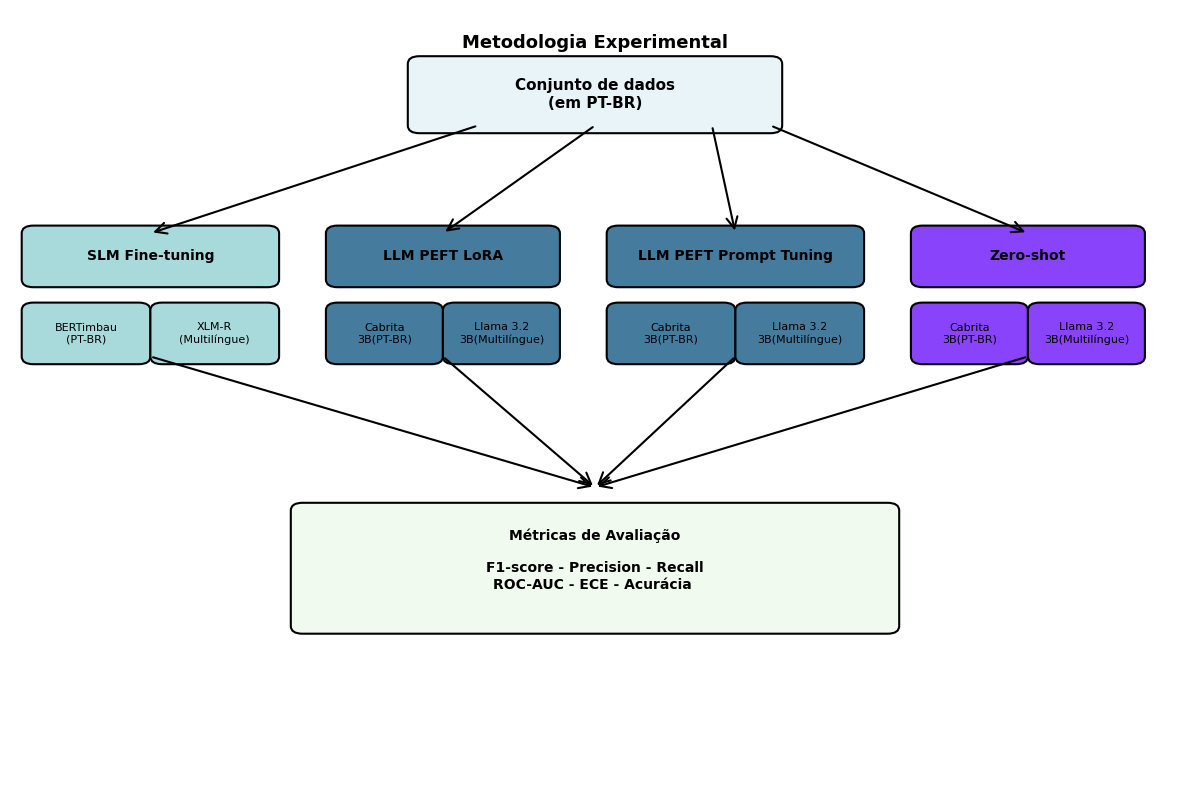

In [3]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.patches import FancyBboxPatch, FancyArrowPatch
import matplotlib.lines as mlines

# Configuração da figura
fig, ax = plt.subplots(figsize=(12, 8))
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
ax.axis('off')

# Cores
color_dataset = '#e8f4f8'
color_slm = '#a8dadc'
color_llm_peft = '#457b9d'
color_llm_zero = "#8943fa"
color_metrics = '#f1faee'

# Função auxiliar para criar caixas
def create_box(ax, x, y, width, height, text, color, fontsize=10, bold=False):
    box = FancyBboxPatch((x, y), width, height,
                          boxstyle="round,pad=0.1",
                          edgecolor='black', facecolor=color,
                          linewidth=1.5)
    ax.add_patch(box)
    weight = 'bold' if bold else 'normal'
    ax.text(x + width/2, y + height/2, text,
            ha='center', va='center',
            fontsize=fontsize, weight=weight, wrap=True)

# Função para criar setas
def create_arrow(ax, x1, y1, x2, y2, style='->'):
    arrow = FancyArrowPatch((x1, y1), (x2, y2),
                           arrowstyle=style,
                           color='black',
                           linewidth=1.5,
                           mutation_scale=20)
    ax.add_patch(arrow)

# ========================================
# DATASET (topo)
# ========================================
create_box(ax, 3.5, 8.5, 3, 0.8, 'Conjunto de dados\n(em PT-BR)', 
           color_dataset, fontsize=11, bold=True)

# ========================================
# MÉTODO 1: SLM Fine-tuning (esquerda superior)
# ========================================
create_box(ax, 0.2, 6.5, 2, 0.6, 'SLM Fine-tuning', 
           color_slm, fontsize=10, bold=True)

create_box(ax, 0.2, 5.5, 0.9, 0.6, 'BERTimbau\n(PT-BR)', 
           color_slm, fontsize=8)

create_box(ax, 1.3, 5.5, 0.9, 0.6, 'XLM-R\n(Multilíngue)', 
           color_slm, fontsize=8)

# Setas do dataset para SLM
create_arrow(ax, 4.0, 8.5, 1.2, 7.1)

# ========================================
# MÉTODO 2: LLM LoRA (centro-esquerda)
# ========================================
create_box(ax, 2.8, 6.5, 1.8, 0.6, 'LLM PEFT LoRA', 
           color_llm_peft, fontsize=10, bold=True)

create_box(ax, 2.8, 5.5, 0.8, 0.6, 'Cabrita\n3B(PT-BR)', 
           color_llm_peft, fontsize=8)

create_box(ax, 3.8, 5.5, 0.8, 0.6, 'Llama 3.2\n3B(Multilíngue)', 
           color_llm_peft, fontsize=8)

# Setas do dataset para LoRA
create_arrow(ax, 5.0, 8.5, 3.7, 7.1)

# ========================================
# MÉTODO 3: LLM Prompt Tuning (centro-direita)
# ========================================
create_box(ax, 5.2, 6.5, 2.0, 0.6, 'LLM PEFT Prompt Tuning', 
           color_llm_peft, fontsize=10, bold=True)

create_box(ax, 5.2, 5.5, 0.9, 0.6, 'Cabrita\n3B(PT-BR)', 
           color_llm_peft, fontsize=8)

create_box(ax, 6.3, 5.5, 0.9, 0.6, 'Llama 3.2\n3B(Multilíngue)', 
           color_llm_peft, fontsize=8)

# Setas do dataset para Prompt Tuning
create_arrow(ax, 6.0, 8.5, 6.2, 7.1)

# ========================================
# MÉTODO 4: Zero-shot (direita)
# ========================================
create_box(ax, 7.8, 6.5, 1.8, 0.6, 'Zero-shot', 
           color_llm_zero, fontsize=10, bold=True)

create_box(ax, 7.8, 5.5, 0.8, 0.6, 'Cabrita\n3B(PT-BR)', 
           color_llm_zero, fontsize=8)

create_box(ax, 8.8, 5.5, 0.8, 0.6, 'Llama 3.2\n3B(Multilíngue)', 
           color_llm_zero, fontsize=8)

# Setas do dataset para Zero-shot
create_arrow(ax, 6.5, 8.5, 8.7, 7.1)

# ========================================
# Setas convergindo para métricas
# ========================================
# Pontos de origem (base de cada método)
origins = [
    (1.2, 5.5),   # SLM
    (3.7, 5.5),   # LoRA
    (6.2, 5.5),   # Prompt
    (8.7, 5.5),   # Zero-shot
]

# Ponto de convergência (acima da caixa de métricas)
convergence = (5.0, 3.8)

# Desenhar setas convergentes
for origin in origins:
    create_arrow(ax, origin[0], origin[1], convergence[0], convergence[1])

# ========================================
# MÉTRICAS (parte inferior)
# ========================================
create_box(ax, 2.5, 2.0, 5, 1.5, 
           'Métricas de Avaliação\n\n' +
           'F1-score - Precision - Recall\n' +
           'ROC-AUC - ECE - Acurácia \n',
           color_metrics, fontsize=10, bold=True)

'''
# ========================================
# Legenda lateral
# ========================================
legend_y = 0.5
ax.text(0.2, legend_y, 'Legenda:', fontsize=9, weight='bold')

legend_items = [
    (color_slm, 'SLM (~110-270M params)'),
    (color_llm_peft, 'LLM PEFT (~3B params)'),
    (color_llm_zero, 'LLM Zero-shot (sem treino)'),
]

for i, (color, label) in enumerate(legend_items):
    y_pos = legend_y - 0.4 - (i * 0.35)
    rect = mpatches.Rectangle((0.2, y_pos), 0.3, 0.2, 
                               facecolor=color, edgecolor='black')
    ax.add_patch(rect)
    ax.text(0.6, y_pos + 0.1, label, fontsize=8, va='center')
'''
# ========================================
# Título
# ========================================
ax.text(5.0, 9.5, 'Metodologia Experimental',
        ha='center', fontsize=13, weight='bold')

plt.tight_layout()
plt.savefig('fig1_architecture.png', dpi=300, bbox_inches='tight', 
            facecolor='white', edgecolor='none')
plt.savefig('fig1_architecture.pdf', dpi=300, bbox_inches='tight',
            facecolor='white', edgecolor='none')
print("✅ Figura 1 salva: fig1_architecture.png e fig1_architecture.pdf")
plt.show()